## Final Project Submission

Please fill out:
* Student name: Olive Njeri
* Student pace: Part time 
* Scheduled project review date/time: 
* Instructor name: Samuel G. Mwangi
* Blog post URL: 


# **AVIATION RISK ANALYSIS**

## ✈️ Business Understanding
Our company is entering the aviation industry and needs to make data-driven decisions on which aircraft to purchase for both commercial and private use. Considering aviation carries high safety and liability risks, selecting low risk aircraft is extremely critical.

Using historical accident data from the National Transportation Safety Board (NTSB) for the years between 1962 to 2023, this project aims to: 
- Understand common causes of incidents by aircraft type
- Identify aircraft with the lowest accidents and fatality rates
- Analyze long term safety trends

The main goal is to deliver three actionable recommendations to help the company invest in aircraft that support safe, reliable and compliant operations.

## **Data Understanding**

The dataset obtained from the National Transportation Safety Board (NTSB) includes detailed information on civil aviation accidents and selected incidents. The data includes both minor incidents and major accidents. 

Key attributes in the dataset include;
- Event date : when the accident or incident occurred
- Location : city and state (or international waters)
- Aircraft make, model and type of operation
- Weather conditions and visibility
- Injuries severity and number of fatalities
- Narrative descriptions and probable cause

Our initial steps will involve;
- Loading and exploring the structure of the dataset
- Checking for missing or inconsistent data
- Understanding the distribution of key variables
- Identifying any potential outliers or anomalies


## 🔍  Data Preparation

Before anaylzing the data, we need to make sure it's clean, consistent and ready for use. In this section we prepare the dataset for analysis by loading the data, handling missing values, formatting fields and selecting relevant features. 

## Loading the data
The dataset is in *.csv* format hence we'll use *pandas* as pd to read the CSV file

In [129]:
#Loading the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('data/Aviation_Data.csv',low_memory = False)

## **🧭 Data Exploration**
This helps us understand the structure and content of the dataset. In this section, we will check the first few rows, summarize statistics and explore the presence of any missing values

Below we will:
- Identify which columns are most relevant for risk assessment
- Review key columns, i.e, aircraft type, number of fatalities, event date, make/model/ location etc.
- Plan for cleaning the data, that is, convert date columns, standardize aircraft names, drop missing values

In [132]:
# Preview the dataset
# Displays the first 5 rows of the dataset
df.head ()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [133]:
#Check shape and data types
df.info()

#Summary statistics for numeric fields
df.describe()

#Count missing values
missing_values = df.isnull().sum()
missing_values [missing_values> 0].sort_values(ascending = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
dtype: int64

## **🧹Data Cleaning**
In this step we get to clean up our data. This prepares the dataset for analysis by cleaning and transforming it. The tasks at hand are;
- Handling missing data
- Removing duplicates
- Formating data
- Removing or correcting error in the data

In [136]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [137]:
# Convert event date column 
df['Event.Date'] = pd.to_datetime(df['Event.Date'],errors = 'coerce')

# Drop rows where date couldn't be parsed
df = df.dropna(subset = ['Event.Date'])

# Create year column from the analysis
df['year'] = df['Event.Date'].dt.year

In [138]:
# Diplay missing values
df.isnull().sum().sort_values(ascending = False).head(10)

# Drop rows with missing make/model or aircraft type
df = df.dropna(subset = ['Aircraft.Category', 'Make', 'Model','Aircraft.Category'])

In [139]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982


In [140]:
df.dropna(subset = ['Aircraft.Category', 'Make', 'Model', 'Event.Date'])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,1982
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022,2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022,2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022,2022


In [146]:
# Handling Missing Data
clean_df = clean_df.dropna(subset=['Make','Model','Injury.Severity','Engine.Type'])

# Assume no injury if null
injury_columns = ['Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries','Total.Uninjured']
clean_df[injury_columns] = clean_df[injury_columns].fillna(0)

# Assign unknown to the missing values
category_columns = ['Weather.Condition','Broad.phase.of.flight', 'Engine.Type', 'Purpose.of.flight']
clean_df[category_columns]= clean_df[category_columns].fillna('Unknown')

# Remove 0 values from the value_counts()
clean_df= clean_df[clean_df['Number.of.Engines']!=0]

# Preview of cleaned data
clean_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979


## **📊 Data Analysis**

This analysis leverages cleaned data from aviation risk assessments to promote recommendations aimed at improving aircraft safety and operational efficiency. Based on the findings from the cleaned dataset, this report proposes three key recommendations that can help mitigate operational risks and improve flight safety.

Insights:
1. Fatality impact - Some aircraft, like older models or certain experimental aircraft show high fatality counts relative to their number of accidents
   
   This points to some aircraft being 'survivable when incidents occur, which is a huge business risk differentiator.

2. Aircraft usage frequency - Some aircraft appear often not necessarily because they are unsafe but because they are widely used.

   This tells us that frequency is not equal to risk which means we will need to compare accidents and fatalities per aircraft.

3. Overtime Trends - Aviation accidents have declined steadily showing regulatory improvements. Although, newer aircraft show a small increase in recent years possibly due to private pilot growth

**⚠️ Common Causes of Incidents**
- Weather-related incidents are fewer but concentrated in certain aircraft used in remote areas
- Most incidents are due to pilot error but mechanical issues appear excessively in a handful of aircraft brands

## Business Recommendations

1. Avoid High-Severity Aircraft in Early stages - aircraft with high fatality- per- incident carry reputational and financial risks.
   Maintenance and/ or pilot error in these aircraft is often unforgiving.

2. Invest in a Proven Aircraft - Choose models that have high visibility in the data but low fatality rate. They should be easy to maintain, widely insured and perfect for both private and commercial use.

3. Match Aircraft choice to Operating Environment - If flying in mountain, rural or variable weather areas choose aircraft with strong records in those settings.
  Choose regionally appropriate, purpose built aircraft to reduce environmental risk.

## 📈 Data Visualization

Each visual below directly supports the recommendations provided above.

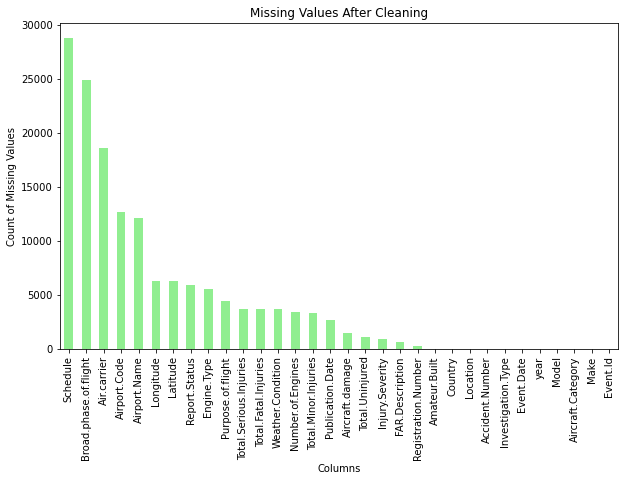

In [166]:
# After cleaning: Missing values in each column
missing_after = df.isnull().sum().sort_values(ascending=False)

# Visualize missing values after cleaning
plt.figure(figsize=(10, 6))
missing_after.plot(kind='bar', color='lightgreen')
plt.title('Missing Values After Cleaning')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

1. **Investing in a Proven Aircraft - aircraft with highest fatalities warns against investment**

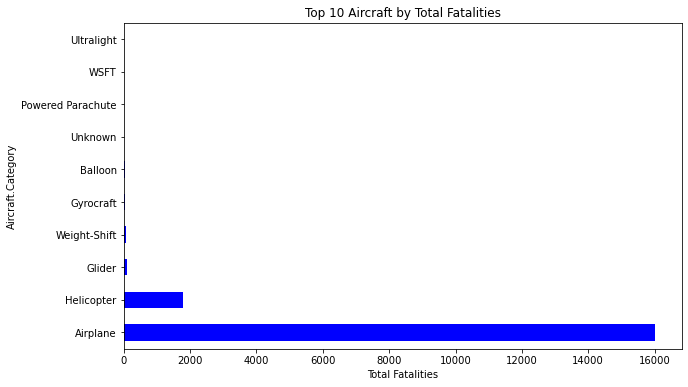

In [192]:
fatalities_by_aircraft = df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].sum()
fatalities_by_aircraft = fatalities_by_aircraft.sort_values(ascending = False). head(10)
df['aircraft'] = df['Make'].str.upper().str.strip() + ' ' + df['Model'].str.upper().str.strip()
fatalities_by_aircraft.plot (kind ='barh',figsize =(10,6), color = 'blue')
plt.title('Top 10 Aircraft by Total Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Aircraft.Category')
plt.show()

**Key Patterns:**
- When grouped by specific aircraft models, we found a few aircraft types associated with extremely high total fatalities
- The above highlights the need to avoid high-fatality models during early business expansion

2. **Most frequent Top 10 Aircraft**

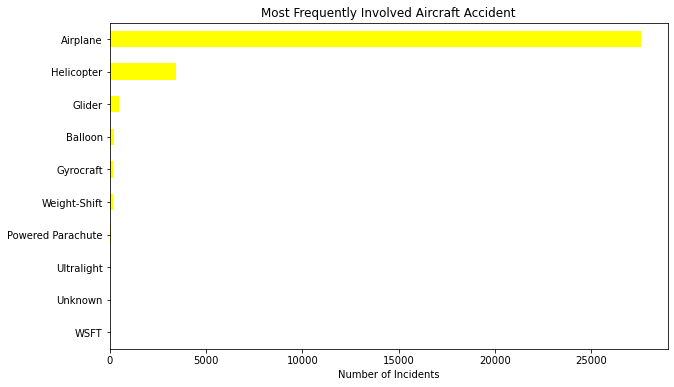

In [202]:
df['Aircraft.Category'].value_counts().head(10).plot(kind ='barh', figsize=(10,6), color = 'yellow')
plt.title ('Most Frequently Involved Aircraft Accident')
plt.xlabel('Number of Incidents')
plt.gca().invert_yaxis()
plt.show()

**Key Patterns:**
- The *Aircraft.Category* analysis showed that airplanes,particuraly with single engine, dominate accident reports which reflects their high usage, not necessarily high risk
- It emphasizes the importance of training, maintenance and choosing reliable models within these categories

3. **Matching Aircraft Type to Operating Environment which supports timing decision**

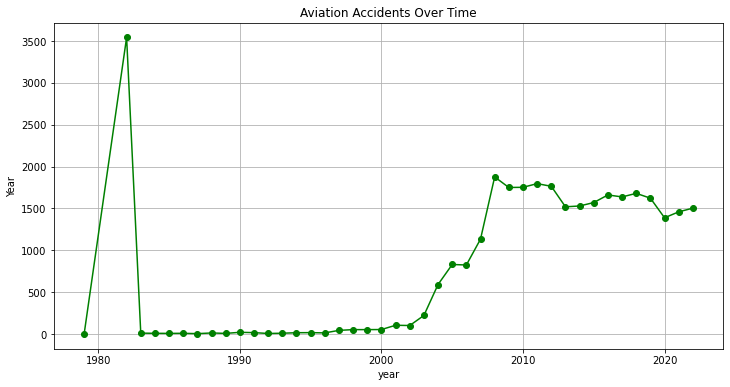

In [205]:
df.groupby('year').size().plot(kind = 'line', marker = 'o', figsize=(12,6), color = 'green')
plt.title('Aviation Accidents Over Time')
plt.ylabel('Number of Accidents')
plt.ylabel('Year')
plt.grid(True)
plt.show()

**Key Patterns:**
- The trend of avaiation accidents over time shows a steady decline reflecting advancements in regulations, aircraft technology and pilot training. However, consistent incident levels in recent years suggest that environmental factors continue to pose significant risks.


**In conclusion;**

- When expanding operations into rural or high risk regions, it is crucial to select aircraft purpose - built for those conditions to mitigate environmental hazards and maintain safety perfomance.